In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:

import flexura

ModuleNotFoundError: No module named 'flexura'

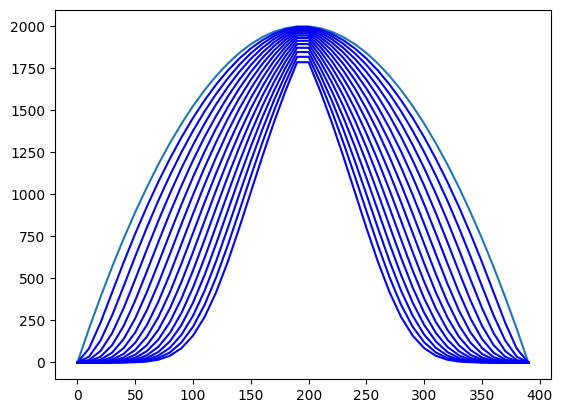

In [11]:
t = 0.0
dt = 100_000.0 #anos
dx = 10_000.0  #metros

x = np.arange(0.0,400_000,dx)
n = np.size(x)

Kf0 = 20.0 #fator que controla a taxa de erosão
Kf1 = 40.0
Kf = x*0 +Kf0
#Kf[x>200_000.0] = Kf1

h = x*(x[-1] - x)
h = 2000.0*h/np.max(h)
plt.plot(x/1000,h)


t_print = 10.0E6
while t <= 150.0E6:
  ind = np.argsort(h) #ordenado, do menor para o maior
  ind = ind[::-1] #invertendo o vetor (do maior para o menor)

  qr = h*0 + 1.0
  denu = h*0

  for i in ind:
    if(i>0 and i <n-1):
      hh = h[i]
      hhe = h[i-1]
      hhd = h[i+1]

      if (hh>hhe):
        if (hhe<hhd):
          denu[i] = Kf[i]*qr[i]**0.5*(hh-hhe)/dx
          qr[i-1] += qr[i]
        elif (hhd<hh):
          denu[i] = Kf[i]*qr[i]**0.5*(hh-hhd)/dx
          qr[i+1] += qr[i]
      elif (hhd<hh):
        denu[i] = Kf[i]*qr[i]**0.5*(hh-hhd)/dx
        qr[i+1] += qr[i]
  h -= denu
  t += dt      
  if(t>t_print):
    plt.plot(x/1000,h,"b")
    t_print += 10.0E6


In [12]:
def flexura_num(x,Te, p, rhoi=1000.0, rompida=False):
  """
  Solução numérica para equação de flexura
  """
  dx = x[1]-x[0] # Conta com intervalos regulares

  E = 1.0E11 # Modulo de elasticidade ou modulo de Young (PA)
  v = 0.25 # Coeficiente de Poisson (não tem unidade)
  g = 9.8 # aceleração da gravidade (m/s2)


  rhom = 3300.0 # Densidade do manto (kg/m3)
  drho = rhom-rhoi


  D = E*Te**3/(12*(1-v**2))

  n = np.size(x)

  A = np.zeros((n,n))
  A[range(n),range(n)] = 6*D + dx**4*drho*g
  A[range(n-1),range(1,n)] = -4*D
  A[range(1,n),range(n-1)] = -4*D

  A[range(n-2),range(2,n)] = D
  A[range(2,n),range(n-2)] = D

  if rompida == True:
    A[0,0] = 2*D + dx**4*drho*g
    A[0,2] = 2*D
    A[1,0] = -2*D
    A[1,1] = 5*D + dx**4*drho*g


  q = p*dx**4

  w = np.linalg.solve(A,q)

  return w


In [ ]:
def erosion(x,h,sl,dt,kf):
    ind = np.argsort(h)
    ind = ind[::-1]
    dx = x[1] - x[0]
    n = np.size(x)

    area = h*0+dx # basin area
    denu = h*0

    for i in ind:
        if (i>0 and i<n-1 and h[i]>sl):
            hh = h[i]
            hhe = h[i-1]
            hhd = h[i+1]

            if (hh>hhe):
                if (hhe<hhd):
                    denu[i] = dt*kf*np.sqrt(area[i]*(hh-hhe)/dx)
                    area[i-1] += area[i]
                else:
                    denu[i] = dt*kf*np.sqrt(area[i]*(hh-hhd)/dx)
                    area[i+1] += area[i]
        elif (hh>hhd):
                denu[i] = dt*kf*np.sqrt(area[i]*(hh-hhd)/dx)
                area[i+1] += area[i]
return denu




In [13]:
a = np.array([10,40,60,30,20])
print(a)

sort_a = np.argsort(a)
print(sort_a)
print(a[sort_a])

[10 40 60 30 20]
[0 4 3 1 2]
[10 20 30 40 60]
